ALSA lib ../../../src/pcm/pcm_direct.c:2049:(snd1_pcm_direct_parse_open_conf) The field ipc_gid must be a valid group (create group audio)
ALSA lib ../../../src/pcm/pcm_direct.c:2049:(snd1_pcm_direct_parse_open_conf) The field ipc_gid must be a valid group (create group audio)
ALSA lib ../../../src/pcm/pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib ../../../src/pcm/pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib ../../../src/pcm/pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib ../../oss/pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib ../../oss/pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib ../../src/confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib ../../usb_stream/pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib ../../src/confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib ../../usb_stream/pcm_usb_stream.c:482

running
done


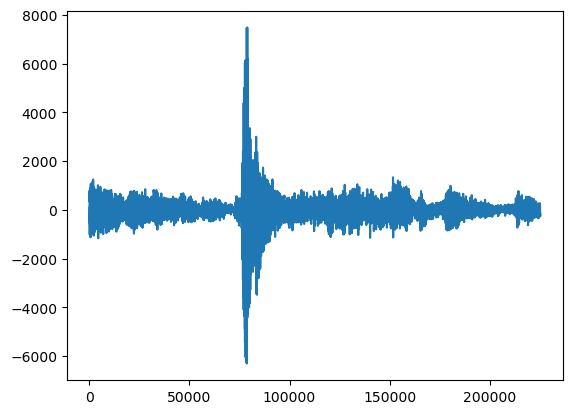

In [82]:
import pyaudio
import numpy
import matplotlib.pyplot as plt

def aufnahme():
    FORMAT = pyaudio.paInt16
    SAMPLEFREQ = 44100
    FRAMESIZE = 1024
    NOFFRAMES = 220
    p = pyaudio.PyAudio()
    print("running")
    stream = p.open(format=FORMAT,channels=1,rate=SAMPLEFREQ,
    input=True,frames_per_buffer=FRAMESIZE)
    data = stream.read(NOFFRAMES*FRAMESIZE)
    decoded = numpy.frombuffer(data,dtype=numpy.int16);
    stream.stop_stream()
    stream.close()
    p.terminate()
    print("done")
    numpy.save("../Versuch4/file",decoded)
    plt.plot(decoded)
    plt.show()
aufnahme()

In [105]:

def trigger(path,threshold):
    sample = numpy.load(path)
    x = []
    for i in range(0,len(sample)):
        if(sample[i] >= threshold):
            x = sample[i:-1]
    return x

test = trigger("./file.npy",4000)
plt.plot(test)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed